In [11]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure,data
import cv2
import imageio

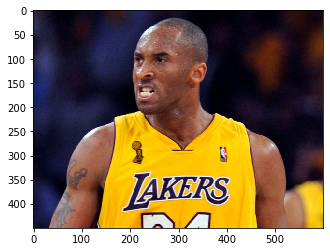

In [12]:
#image = plt.imread('1.jpg')    
x = plt.imread('kobe.jpg')
plt.imshow(x)
b, g, r = cv2.split(x)


In [14]:
x0=image.copy()
x1=image.copy()
x2=image.copy()
#0.png 
x0[:,:,1]=0
x0[:,:,2]=0
#1.png 
x1[:,:,0]=0
x1[:,:,2]=0
#2.png 
x2[:,:,0]=0
x2[:,:,1]=0
imageio.imwrite(r'D:\0.png',x0)#Please modify this path and output image to check whether it is red green or blue
imageio.imwrite(r'D:\1.png',x1)
imageio.imwrite(r'D:\2.png',x2)
#After confirmation, it is valided that image[:,:,0] is red channel, [:,:,1] is green channel, [:,:,2] is blue channel

In [16]:
#Normlization
rows,cols,colors = image.shape
img0=image[:,:,0]/np.sum(image,axis=2)
img1=image[:,:,1]/np.sum(image,axis=2)
img2=image[:,:,2]/np.sum(image,axis=2)
img_1D0=img0.reshape(rows*cols)#r
img_1D1=img1.reshape(rows*cols)#g
img_1D2=img2.reshape(rows*cols)#b
img_norm=np.transpose(np.vstack((img_1D0,img_1D1)))
img_norm=np.nan_to_num(img_norm,nan=0)

c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [17]:
from sklearn.cluster import KMeans
clt = KMeans(n_clusters=3, max_iter=1500, random_state=0, n_init=50)
clt.fit(img_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1500,
       n_clusters=3, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [18]:
print(len(clt.labels_))
img_clt=clt.labels_.reshape(rows,cols)
print(np.shape(img_clt))


270000
(450, 600)


In [19]:

flatten=clt.labels_
print(len(flatten))
#for i in range(len(flatten)):
#    if flatten[i]==1:
#        flatten[i]==255
#    elif flatten[i]==0:
#        flatten[i]==1

tf=flatten.reshape(rows,cols)
cluster_image=np.zeros([tf.shape[0],tf.shape[1],3])
for i in range(tf.shape[0]):
    for j in range(tf.shape[1]):
        if tf[i,j]==0:
            cluster_image[i,j,0]=0
            cluster_image[i,j,1]=0
            cluster_image[i,j,2]=255
        elif tf[i,j]==1:
            cluster_image[i,j,0]=0
            cluster_image[i,j,1]=255
            cluster_image[i,j,2]=0  
        elif tf[i,j]==2:
            cluster_image[i,j,0]=255
            cluster_image[i,j,1]=0
            cluster_image[i,j,2]=0

270000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


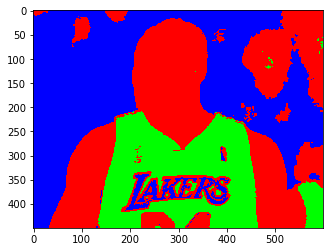

In [20]:
plt.imshow(cluster_image)